In [176]:
import time
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import adjusted_mutual_info_score, adjusted_rand_score, normalized_mutual_info_score

In [198]:
def generate(limit00,limit01, limit10, limit11):
    data0 = np.random.randint(0,limit1,(abs(limit1),2))
    label0 = np.ones(abs(limit1))
    data1 = np.random.randint(limit2,+30,(abs(limit2),2))
    label1 = np.zeros(abs(limit2))
    return (data1)
    


In [200]:
a=generate(100,-100)

In [49]:
n = 100
n2 = -100

On génère 2 tableaux avec des coordonées x et y aléatoires, un de 0 à 100 et un de 0 à -100

In [163]:
data0 = np.random.randint(-30,n,(n,2))
label0 = np.ones(100)
data1 = np.random.randint(n2,+30,(n,2))
label1 = np.zeros(100)

In [164]:
#label0

In [165]:
#scaler=StandardScaler()
#scaler_data = scaler.fit_transform(data)

In [179]:
data = np.concatenate((data0,data1))
labels = np.concatenate((label0,label1))
#print(labels)

In [167]:
k = KMeans(n_clusters=2, random_state=0)

In [168]:
k.fit(data)

KMeans(n_clusters=2, random_state=0)

In [169]:
clusters = k.fit_predict(data)

In [170]:
center=k.cluster_centers_

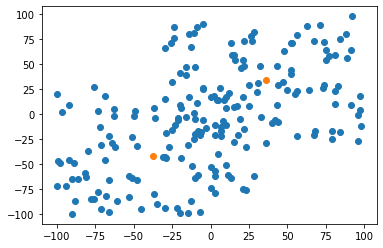

In [171]:
plt.scatter(data[:,0],data[:,1])
plt.scatter(center[:,0],center[:,1])

In [172]:
#k.labels_

In [178]:
print('ami: ',adjusted_mutual_info_score(labels,k.labels_))
print('nmi: ',normalized_mutual_info_score(labels,k.labels_))
print('ar:',adjusted_rand_score(labels,k.labels_))

ami:  0.38793543320498103
nmi:  0.39015969528359856
ar: 0.4874242424242425


In [130]:
def bench_k_means(kmeans, name, data, labels):
    """Benchmark to evaluate the KMeans initialization methods.

    Parameters
    ----------
    kmeans : KMeans instance
        A :class:`~sklearn.cluster.KMeans` instance with the initialization
        already set.
    name : str
        Name given to the strategy. It will be used to show the results in a
        table.
    data : ndarray of shape (n_samples, n_features)
        The data to cluster.
    labels : ndarray of shape (n_samples,)
        The labels used to compute the clustering metrics which requires some
        supervision.
    """
    t0 = time()
    estimator = make_pipeline(StandardScaler(with_mean=False), kmeans).fit(data)
    fit_time = time() - t0
    results = [name, fit_time, estimator[-1].inertia_]

    # Define the metrics which require only the true labels and estimator
    # labels
    clustering_metrics = [
        metrics.homogeneity_score,
        metrics.completeness_score,
        metrics.v_measure_score,
        metrics.adjusted_rand_score,
        metrics.adjusted_mutual_info_score,
    ]
    results += [m(labels, estimator[-1].labels_) for m in clustering_metrics]

    # The silhouette score requires the full dataset
    results += [
        metrics.silhouette_score(data, estimator[-1].labels_,
                                 metric="euclidean")
    ]

    # Show the results
    formatter_result = ("{:9s}\t{:.3f}s\t{:.0f}\t{:.3f}\t{:.3f}"
                        "\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}")
    print(formatter_result.format(*results))


In [110]:
n_digits= 6
#pca.components_= 5

print(82 * '_')
print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')

kmeans = KMeans(init="k-means++", n_clusters=n_digits, n_init=1)
bench_k_means(kmeans=kmeans, name="k-means++", data=data, labels=labels)


kmeans = KMeans(init="random", n_clusters=n_digits, n_init=1, random_state=0)
bench_k_means(kmeans=kmeans, name="random", data=data, labels=labels)

svd =TruncatedSVD(n_components=6)          ######### error: float() argument must be a string or a number, not 'TruncatedSVD'
svd_data=svd.fit_transform(data)
#pca = PCA(n_components=n_digits).fit(data)
kmeans = KMeans(init=svd.components_, n_clusters=n_digits, n_init=1)
bench_k_means(kmeans=kmeans, name="PCA-based", data=svd_data, labels=labels)

print(82 * '_')

__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette


TypeError: 'module' object is not callable